In [564]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("celso.png")
#image = Image.open("keth1.png")
print(f"Image format: {image.format}")
print(f"Image mode: {image.mode}")
print(f"Image size: {image.size}")

#display(image)

Image format: PNG
Image mode: RGBA
Image size: (524, 522)


In [565]:
width = 100
length = 100

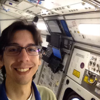

In [566]:
image = image.resize((width, length))
display(image)

In [567]:
import numpy as np
# Convert the image to a NumPy array
pixel_array = np.array(image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

Shape of pixel_array: (100, 100, 4)


Shape of pixel_array: (100, 100)


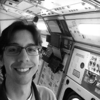

In [568]:
# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the grayscale image to a NumPy array
pixel_array = np.array(gray_image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

# Display the resized image in the notebook
display(gray_image)

In [569]:
width, length = pixel_array.shape
width, length

(100, 100)

In [570]:
def generate_random_solution(width, length):
    size = width * length
    binary_numbers = np.random.randint(0, 2, size=(size, 8), dtype=np.uint8) #binary number str
    binary_representation = ''.join(binary_numbers.ravel().astype(str))
    return binary_representation

In [571]:
solution = generate_random_solution(width, length)
solution

'101111101110101111101101100000000100011100100101101101011000011011111001111101001011100111001101011010101011101110000100010101011000000110111010110011011001001111110000101110011101110001110000100100011111010000100101011001010001100111010101011111110010000011110010100001000110011111111000101111001110101001111100010001011101100010101111000000101111010000110111101010001110011100101110010010111010010100100000001111100011001111100101101111111010110000100011110100111100001010011100011000010000111000111001100100011001110010001110110101110010101011011111100011110111010001010111011001111101100001101101110000010100011111100101111100001100111000001100011001000101000110100101111001100000001100001110010101101100000101100101111101010111010001101111001000100111011111001110100011011010100101001111100011000011101010100100110111111011101011000100001011011111000111101001101011010000011010100100000110100111011100111001011010011111011010011011111111010010100100011001110010000100000010000001000010101111001

In [572]:
import numpy as np

def solution_to_array(binary_representation, width, length):
    size = width * length
    binary_length = 8
    assert len(binary_representation) == size * binary_length, "Invalid binary representation length"

    # Split the binary string into 8-character chunks
    binary_chunks = [binary_representation[i:i+binary_length] for i in range(0, size * binary_length, binary_length)]

    # Convert binary chunks to integers using int('11111111', 2)
    integers = [int(chunk, 2) for chunk in binary_chunks]

    # Create a numpy array from the integers
    array = np.array(integers, dtype=np.uint8).reshape(width, length)

    return array


In [573]:

binary_representation = generate_random_solution(width, length)
array = solution_to_array(solution, width, length)

In [574]:
def display_solution(solution):
    img = Image.fromarray(np.uint8(solution))
    display(img)

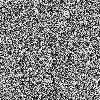

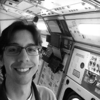

In [575]:
display_solution(array)
display_solution(pixel_array)

In [576]:
import numpy as np

def fitness_function(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    # Initialize the score to 0
    score = 0
    # Iterate over the elements of both arrays
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1

    return score

In [577]:
score = fitness_function(array, pixel_array)
print("Score:", score)

Score: 35


In [578]:
def fitness_function2(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    score = 0

    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1
    # Check if entire rows match and increment the score by 20 points
    for i in range(array1.shape[0]):
        if np.array_equal(array1[i], array2[i]):
            score += 20
    # Check if entire columns match and increment the score by 20 points
    for j in range(array1.shape[1]):
        if np.array_equal(array1[:, j], array2[:, j]):
            score += 20
            
    return score

In [579]:
array_list = []
for i in range(2):
    binary_representation = generate_random_solution(width, length)
    array = solution_to_array(solution, width, length)
    array_list.append(array)

In [580]:
def perturbate_solution(s, n):
    for i in range(n):
        pos = np.random.choice(len(s))
        
        binary_list = list(s)
        
        if binary_list[pos] == '0':
            binary_list[pos] = '1'
        else:
            binary_list[pos] = '0'
        
        s = ''.join(binary_list)
    
    return s

In [581]:
solution == perturbate_solution(solution, 1)

False

In [582]:
binary_representation = generate_random_solution(width, length)
binary_representation

'000011111011011100111111101101011100111110001110111101010101011001111011101111000011010011110101010100011011001010000010011100101011110110101110010001010010111111010010110111001001110000110010010011011101011111011100100100110100111000010111101111010001001001100100011010011101111101101000001111011000110101001111100000010000000110111010000010111110110010110010101011111001010011010011010111000000011011010100010111111100011000110101010010100010001000000100110000011110000111000110011000011110010001100010101000000001110111010101111000100101111111111111101011111011001001100010000010110010011100111011110000100011111001100111010000101001100010111111010111000110000010101101011011100110001011111110011100011111000011011010110100011111000110000001111011010100100000001110101111001110000100011101111001010001111101111000000101110010010110011110110111010011101010010011100110100011100100001100010111001101011101111100000000011010000111111010001101000010011010101101001010011110000000011111000101100000011

In [583]:
def generate_neighborhood(n_neighbors, current_solution):
    neighborhood = []
    for i in range(n_neighbors):
        new_solution = current_solution
        while((new_solution in neighborhood) or (new_solution == current_solution)):
            new_solution = perturbate_solution(current_solution, 1)
        neighborhood.append(new_solution)
    return neighborhood

In [584]:
generate_neighborhood(5, solution)

['10111110111010111110110110000000010001110010010110110101100001101111100111110100101110011100110101101010101110111000010001010101100000011011101011001101100100111111000010111001110111000111000010010001111101000010010101100101000110011101010101111111001000001111001010000100011001111111100010111100111010100111110001000101110110001010111100000010111101000011011110101000111001110010111001001011101001010010000000111110001100111110010110111111101011000010001111010011110000101001110001100001000011100011100110010001100111001000111011010111001010101101111110001111011101000101011101100111110110000110110111000001010001111110010111110000110011100000110001100100010100011010010111100110000000110000111001010110110000010110010111110101011101000110111100100010011101111100111010001101101010010100111110001100001110101010010011011111101110101100010000101101111100011110100110101101000001101010010000011010011101110011100101101001111101101001101111111101001010010001100111001000010000001000000100001010111100

In [585]:
def update_tabu_list(tabu_list, max_length, solution):
    if max_length == len(tabu_list):
        tabu_list.pop()
        tabu_list.insert(0, solution)
    else:
        tabu_list.append(solution)
        
    return tabu_list

[[190 235 237 ... 169  79 140]
 [ 58 164 223 ... 152  46  80]
 [240 121 149 ... 183 242 188]
 ...
 [  8  53 159 ...  80  38 234]
 [248 100 143 ... 176 221  92]
 [203  13  30 ...  79 117 247]]


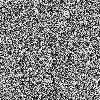

In [586]:
array = solution_to_array(solution, width, length)
print(array)
display_solution(array)

In [587]:
s0 = generate_random_solution(width, length)


solution_to_array(s0, width, length)

array([[ 76, 189,  20, ..., 112,  28, 250],
       [141,  49, 239, ...,  64,  79, 183],
       [162,  33,  62, ..., 115, 167, 183],
       ...,
       [229, 104, 247, ..., 206,  52, 186],
       [143,  60,  48, ..., 178,  96, 175],
       [  7, 105, 137, ..., 130, 126,   3]], dtype=uint8)

In [588]:
def solution_score(phrase, solution_phrase):
    phrase_list = [i for i in phrase]
    solution_list = [i for i in solution_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if solution_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    if score == 0:
        score = 0.00000001
    else:
        score = (score / len(phrase))
        
    return 1 - score

In [589]:
import numpy as np

def array_to_solution(array):
    assert isinstance(array, np.ndarray), "Input must be a numpy array"
    assert array.ndim == 2, "Input array must be 2-dimensional"
    
    width, length = array.shape
    binary_chunks = []

    # Convert integers to binary strings and pad with zeros to make each chunk 8 characters long
    for row in range(width):
        for col in range(length):
            binary_chunk = format(array[row, col], '08b')
            binary_chunks.append(binary_chunk)

    # Concatenate binary chunks to form the binary representation
    binary_representation = ''.join(binary_chunks)

    return binary_representation

In [590]:
def tabu_search(max_iterations, n_neighbors, early_stop_n, tabu_list_len, pixel_array):
    bin_phrase = array_to_solution(pixel_array)
    tabu_list, bin_list, bin_bests, score_list, best_scores, mean_scores = [], [], [], [], [], []

    s0 = generate_random_solution(width, length) #Initial Solution
    best_score = solution_score(bin_phrase, s0)
    best_solution = s0
    iteration, best_iteration = 0, 0
    
    while (iteration <= max_iterations) and (iteration - best_iteration <= early_stop_n):
        #Neighborhood and scores
        neighborhood = generate_neighborhood(n_neighbors, s0)
        neighbors_scores = [solution_score(neighbor, bin_phrase) for neighbor in neighborhood]
        min_neighbor_score =  min(neighbors_scores)
        best_neighbor = neighborhood[neighbors_scores.index(min_neighbor_score)]
        
        if (best_neighbor not in tabu_list) or (min_neighbor_score <= best_score):
            tabu_list = update_tabu_list(tabu_list, tabu_list_len, best_neighbor)
            s0, s0_score = best_neighbor, min_neighbor_score
            
            score_list.append(s0_score)
            mean_scores.append(np.mean(neighbors_scores))
            if s0_score <= best_score:
                best_score = s0_score
                best_solution = s0
                best_iteration = iteration
                bin_bests.append(best_solution)
                best_scores.append(best_score)
            
        
        if iteration % 1000 == 0:
            print(f"iteration: {iteration} | best_score {best_score}")
            bin_list.append(s0)
        iteration += 1
        
    return best_solution, best_score, bin_list, score_list, bin_bests, best_scores, mean_scores


In [591]:
best_solution, best_score, bin_list, score_list, bin_bests, best_scores, mean_scores = tabu_search(max_iterations = 100000, n_neighbors = 15, early_stop_n = 150, tabu_list_len = 30, pixel_array = pixel_array)

iteration: 0 | best_score 0.49834999999999996
iteration: 1000 | best_score 0.48585
iteration: 2000 | best_score 0.47335000000000005
iteration: 3000 | best_score 0.46085
iteration: 4000 | best_score 0.44835
iteration: 5000 | best_score 0.43584999999999996
iteration: 6000 | best_score 0.42335
iteration: 7000 | best_score 0.410875
iteration: 8000 | best_score 0.39842500000000003
iteration: 9000 | best_score 0.38597499999999996
iteration: 10000 | best_score 0.373475
iteration: 11000 | best_score 0.36105
iteration: 12000 | best_score 0.34857499999999997
iteration: 13000 | best_score 0.336075
iteration: 14000 | best_score 0.3236
iteration: 15000 | best_score 0.311225
iteration: 16000 | best_score 0.29884999999999995
iteration: 17000 | best_score 0.28645
iteration: 18000 | best_score 0.2741
iteration: 19000 | best_score 0.26180000000000003
iteration: 20000 | best_score 0.249575
iteration: 21000 | best_score 0.23745000000000005
iteration: 22000 | best_score 0.22547499999999998
iteration: 23000

0.05301250000000002 45391


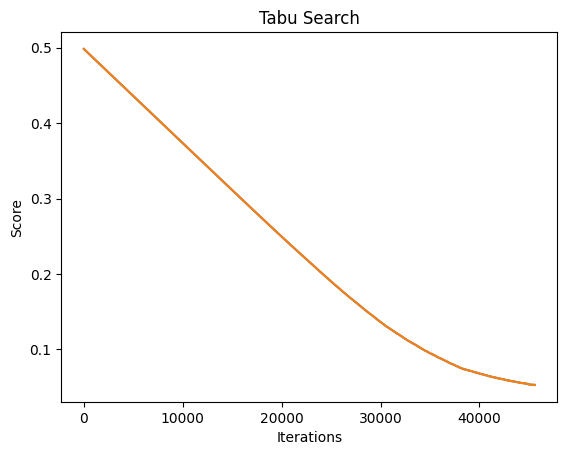

In [592]:
min_score = min(score_list)
index_min = score_list.index(min_score)
bin_list_to_gif = bin_list[:index_min]

print(min_score, index_min)

plt.plot(score_list);
plt.plot(mean_scores);
plt.title("Tabu Search");
plt.xlabel("Iterations");
plt.ylabel("Score");

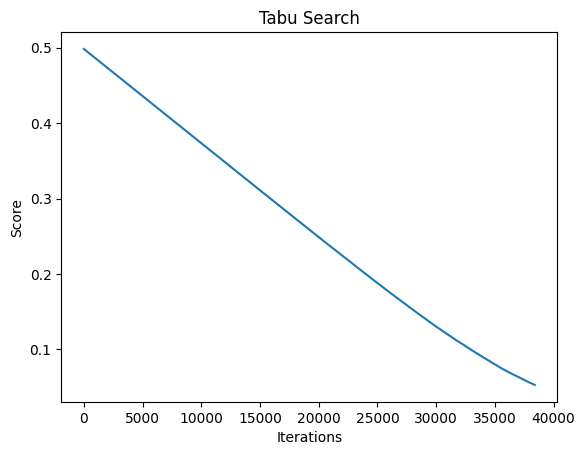

In [593]:
plt.plot(best_scores);
plt.title("Tabu Search");
plt.xlabel("Iterations");
plt.ylabel("Score");

In [594]:
#text_list = [decode_binary_to_phrase(bin_string) for bin_string in bin_list_to_gif]
#generate_GIF(text_list, gif_name = 'TsEasy', seconds_per_frame= 0.001);

In [595]:
final_array_list = [solution_to_array(bin_string, width, length) for bin_string in bin_list_to_gif]
final_array_list

[array([[ 96, 169, 238, ...,  72, 151, 119],
        [108,  94, 166, ..., 125, 109,   2],
        [ 66, 125, 112, ..., 133, 159,  98],
        ...,
        [107, 125,  32, ..., 153, 236, 223],
        [ 27, 139, 216, ..., 151, 148, 174],
        [ 93,  62, 106, ...,  50,  67,  44]], dtype=uint8),
 array([[ 96, 169, 238, ...,  72, 151, 119],
        [108,  94, 166, ..., 117, 109,   2],
        [ 66, 125, 112, ..., 133, 159,  98],
        ...,
        [107, 125,  32, ..., 153, 236, 223],
        [ 27, 138, 216, ..., 151, 148, 174],
        [ 93,  62, 107, ...,  50,  67,  46]], dtype=uint8),
 array([[ 96, 169, 238, ...,  74, 151, 119],
        [100,  86, 166, ..., 117, 109,   2],
        [ 66, 125, 112, ..., 133, 159, 106],
        ...,
        [107, 125,  32, ..., 153, 236, 223],
        [ 27, 138, 216, ..., 151, 148,  46],
        [ 93,  62, 107, ...,  50,  67,  46]], dtype=uint8),
 array([[ 96, 169, 238, ...,  74, 151, 119],
        [102,  86, 166, ..., 117, 109,   2],
        [ 66, 12

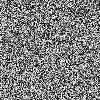

In [596]:
import os
import imageio.v2 as imageio
import numpy as np
from IPython.display import display, Image

def generate_GIF(image_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, image_array in enumerate(image_list):
        image_file = os.path.join(image_folder, f"image_{i}.png")
        # Convert the NumPy array to an image and save it
        imageio.imwrite(image_file, image_array)
        image_files.append(image_file)

    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=0.0001)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path))


generate_GIF(final_array_list)